In [1]:
import warnings

# Ignore all user warnings
warnings.filterwarnings("ignore", category=UserWarning)


In [2]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
def xy_split(df):
    
    return df.drop(columns= 'prognosis'), df.prognosis

In [4]:
df = pd.read_csv('dataset.csv')
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Sort the DataFrame by the 'prognosis' column in alphabetical order
df.sort_values(by='Disease', inplace=True)

# Reset the index
df.reset_index(drop=True, inplace=True)

In [6]:
df.shape

(4920, 18)

In [7]:
# Separate the 'prognosis' column from the rest of the columns
Disease_column = df['Disease']
other_columns = df.drop(columns=['Disease'])

# Sort the other columns in alphabetical order
other_columns = other_columns.reindex(sorted(other_columns.columns), axis=1)

# Concatenate the sorted columns and 'prognosis' column
df_sorted = pd.concat([other_columns, Disease_column], axis=1)

# Print the DataFrame with columns sorted and 'prognosis' column at the end

In [8]:
df = pd.DataFrame(df)

# Replace all null values with 0
df = df.fillna('none')

# Display the resulting DataFrame
df.shape

(4920, 18)

In [9]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,unsteadiness,none,none,none,none,none,none,none,none,none,none,none,none
1,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,none,none,none,none,none,none,none,none,none,none,none
2,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,none,none,none,none,none,none,none,none,none,none,none,none
3,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,none,none,none,none,none,none,none,none,none,none,none
4,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,none,none,none,none,none,none,none,none,none,none,none


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# upgrade wordcloud has been installed

I will be doing a word cloud to identify overall respondent sentiment and specific symptom that drive the disease.

I understand that wordcloud can have words appear similar in size and fail to measure the symptom's value.

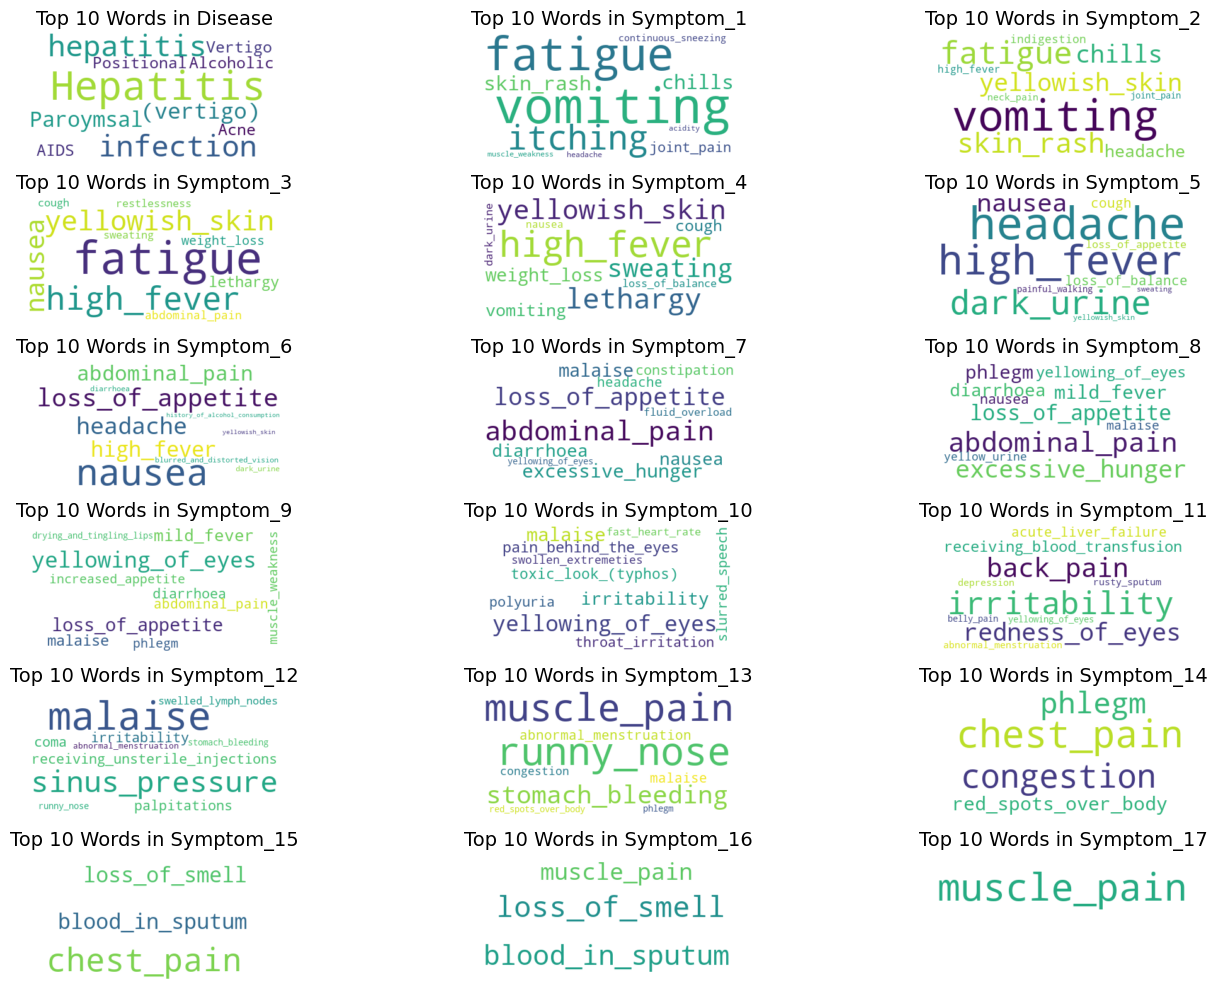

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Specify the columns for which you want to create word clouds
columns_to_analyze = [
    'Disease',
    'Symptom_1',
    'Symptom_2',
    'Symptom_3',
    'Symptom_4',
    'Symptom_5',
    'Symptom_6',
    'Symptom_7',
    'Symptom_8',
    'Symptom_9',
    'Symptom_10',
    'Symptom_11',
    'Symptom_12',
    'Symptom_13',
    'Symptom_14',
    'Symptom_15',
    'Symptom_16',
    'Symptom_17',
]

# Set the number of rows and columns for the grid layout
num_columns = 3
num_rows = (len(columns_to_analyze) + num_columns - 1) // num_columns

# Create subplots for each word cloud
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_analyze):
    column_text = ' '.join(df[column].dropna())
    column_text = column_text.replace('none', '')
    
    # Count the frequency of each word and get the top 10
    word_counts = Counter(column_text.split())
    top_words = word_counts.most_common(10)
    top_words = dict(top_words)
    
    # Generate the word cloud based on the top words
    wordcloud = WordCloud(background_color='white').generate_from_frequencies(top_words)
    
    plt.subplot(num_rows, num_columns, i + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    
    # Set the title with a larger font size
    plt.title(f'Top 10 Words in {column}', fontsize=14)
    
    plt.axis('off')

# Adjust the layout to avoid overlapping
plt.tight_layout()
plt.show()


From this word cloud i can see that more majority of that 

In [12]:
# Specify the columns for which you want to list unique values
columns_to_analyze = [
    'Disease',
    'Symptom_1',
    'Symptom_2',
    'Symptom_3',
    'Symptom_4',
    'Symptom_5',
    'Symptom_6',
    'Symptom_7',
    'Symptom_8',
    'Symptom_9',
    'Symptom_10',
    'Symptom_11',
    'Symptom_12',
    'Symptom_13',
    'Symptom_14',
    'Symptom_15',
    'Symptom_16',
    'Symptom_17',
]

# Create a set to store unique values
unique_values = set()

# Loop through the specified columns and gather unique values
for column in columns_to_analyze:
    unique_values.update(df[column].unique())

# Print the unique values
for value in unique_values:
    print(value)


 patches_in_throat
 drying_and_tingling_lips
 obesity
 diarrhoea
 coma
Fungal infection
Hypothyroidism
none
 vomiting
 pain_during_bowel_movements
Osteoarthristis
 lack_of_concentration
Chicken pox
 spotting_ urination
 muscle_weakness
 muscle_pain
 visual_disturbances
Pneumonia
 small_dents_in_nails
Acne
 inflammatory_nails
 movement_stiffness
 red_sore_around_nose
Psoriasis
 mild_fever
 bladder_discomfort
 acute_liver_failure
 mood_swings
Typhoid
 neck_pain
 lethargy
 excessive_hunger
Malaria
 spinning_movements
 nausea
 irritation_in_anus
 malaise
 bloody_stool
 restlessness
 yellowish_skin
 abnormal_menstruation
 toxic_look_(typhos)
Tuberculosis
Hyperthyroidism
 mucoid_sputum
 extra_marital_contacts
 irritability
 increased_appetite
 loss_of_smell
 fatigue
 yellow_crust_ooze
AIDS
 cold_hands_and_feets
 yellow_urine
 skin_rash
Alcoholic hepatitis
 scurring
 dehydration
Heart attack
 congestion
 enlarged_thyroid
 polyuria
 breathlessness
 red_spots_over_body
 pain_behind_the_eyes
 ye

In [13]:
# Assuming you have a DataFrame 'df' with the 'Symptom_1' column
unique_symptom_1_values = df['Symptom_1'].unique()

# Print the unique values
for value in unique_symptom_1_values:
    print(value)


 vomiting
 headache
 muscle_wasting
 patches_in_throat
 pus_filled_pimples
 skin_rash
 yellowish_skin
 continuous_sneezing
 shivering
 muscle_weakness
 stiff_neck
 fatigue
 cough
 back_pain
 weakness_in_limbs
itching
 chills
 weight_loss
 constipation
 pain_during_bowel_movements
 stomach_pain
 acidity
 sunken_eyes
 breathlessness
 joint_pain
 chest_pain
 mood_swings
 weight_gain
 high_fever
 indigestion
 neck_pain
 burning_micturition
 bladder_discomfort
 cramps


In [14]:
# Assuming you have a DataFrame 'df' with the 'Symptom_1' column
unique_symptom_1_count = df['Symptom_1'].nunique()

# Print the count of unique values
print("Number of unique values in Symptom_1:", unique_symptom_1_count)


Number of unique values in Symptom_1: 34


In [15]:
# List of symptom columns to encode
symptom_columns_to_encode = [
    'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5',
    'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10',
    'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15',
    'Symptom_16', 'Symptom_17'
]

# Loop through each symptom column and encode it
for col in symptom_columns_to_encode:
    # Encode the current symptom column
    encoded_symptom = pd.get_dummies(df[col])
    
    # Rename columns for clarity
    column_mapping = {symptom: f"{col}_{symptom}" for symptom in encoded_symptom.columns}
    encoded_symptom.rename(columns=column_mapping, inplace=True)
    
    # Add the encoded symptom columns to the original DataFrame
    df = pd.concat([df, encoded_symptom], axis=1)
    
    # Drop the original symptom column
    df.drop(col, axis=1, inplace=True)


In [16]:
df.head(10)

,Disease,Symptom_1_ acidity,Symptom_1_ back_pain,Symptom_1_ bladder_discomfort,Symptom_1_ breathlessness,Symptom_1_ burning_micturition,Symptom_1_ chest_pain,Symptom_1_ chills,Symptom_1_ constipation,Symptom_1_ continuous_sneezing,Symptom_1_ cough,Symptom_1_ cramps,Symptom_1_ fatigue,Symptom_1_ headache,Symptom_1_ high_fever,Symptom_1_ indigestion,Symptom_1_ joint_pain,Symptom_1_ mood_swings,Symptom_1_ muscle_wasting,Symptom_1_ muscle_weakness,Symptom_1_ neck_pain,Symptom_1_ pain_during_bowel_movements,Symptom_1_ patches_in_throat,Symptom_1_ pus_filled_pimples,Symptom_1_ shivering,Symptom_1_ skin_rash,Symptom_1_ stiff_neck,Symptom_1_ stomach_pain,Symptom_1_ sunken_eyes,Symptom_1_ vomiting,Symptom_1_ weakness_in_limbs,Symptom_1_ weight_gain,Symptom_1_ weight_loss,Symptom_1_ yellowish_skin,Symptom_1_itching,Symptom_2_ abdominal_pain,Symptom_2_ acidity,Symptom_2_ anxiety,Symptom_2_ blackheads,Symptom_2_ bladder_discomfort,Symptom_2_ blister,Symptom_2_ breathlessness,Symptom_2_ bruising,Symptom_2_ chest_pain,Symptom_2_ chills,Symptom_2_ cold_hands_and_feets,Symptom_2_ cough,Symptom_2_ cramps,Symptom_2_ dehydration,Symptom_2_ dizziness,Symptom_2_ fatigue,Symptom_2_ foul_smell_of urine,Symptom_2_ headache,Symptom_2_ high_fever,Symptom_2_ indigestion,Symptom_2_ joint_pain,Symptom_2_ knee_pain,Symptom_2_ lethargy,Symptom_2_ loss_of_appetite,Symptom_2_ mood_swings,Symptom_2_ nausea,Symptom_2_ neck_pain,Symptom_2_ nodal_skin_eruptions,Symptom_2_ pain_during_bowel_movements,Symptom_2_ pain_in_anal_region,Symptom_2_ patches_in_throat,Symptom_2_ pus_filled_pimples,Symptom_2_ restlessness,Symptom_2_ shivering,Symptom_2_ skin_peeling,Symptom_2_ skin_rash,Symptom_2_ stiff_neck,Symptom_2_ stomach_pain,Symptom_2_ sunken_eyes,Symptom_2_ sweating,Symptom_2_ swelling_joints,Symptom_2_ ulcers_on_tongue,Symptom_2_ vomiting,Symptom_2_ weakness_in_limbs,Symptom_2_ weakness_of_one_body_side,Symptom_2_ weight_gain,Symptom_2_ weight_loss,Symptom_2_ yellowish_skin,Symptom_3_ abdominal_pain,Symptom_3_ altered_sensorium,Symptom_3_ anxiety,Symptom_3_ blackheads,Symptom_3_ blister,Symptom_3_ bloody_stool,Symptom_3_ blurred_and_distorted_vision,Symptom_3_ breathlessness,Symptom_3_ bruising,Symptom_3_ burning_micturition,Symptom_3_ chest_pain,Symptom_3_ chills,Symptom_3_ cold_hands_and_feets,Symptom_3_ continuous_feel_of_urine,Symptom_3_ cough,Symptom_3_ dark_urine,Symptom_3_ dehydration,Symptom_3_ diarrhoea,Symptom_3_ dischromic _patches,Symptom_3_ dizziness,Symptom_3_ extra_marital_contacts,Symptom_3_ fatigue,Symptom_3_ foul_smell_of urine,Symptom_3_ headache,Symptom_3_ high_fever,Symptom_3_ hip_joint_pain,Symptom_3_ joint_pain,Symptom_3_ knee_pain,Symptom_3_ lethargy,Symptom_3_ loss_of_appetite,Symptom_3_ loss_of_balance,Symptom_3_ mood_swings,Symptom_3_ movement_stiffness,Symptom_3_ nausea,Symptom_3_ neck_pain,Symptom_3_ nodal_skin_eruptions,Symptom_3_ obesity,Symptom_3_ pain_in_anal_region,Symptom_3_ red_sore_around_nose,Symptom_3_ restlessness,Symptom_3_ scurring,Symptom_3_ silver_like_dusting,Symptom_3_ skin_peeling,Symptom_3_ spinning_movements,Symptom_3_ stomach_pain,Symptom_3_ sweating,Symptom_3_ swelling_joints,Symptom_3_ swelling_of_stomach,Symptom_3_ ulcers_on_tongue,Symptom_3_ vomiting,Symptom_3_ watering_from_eyes,Symptom_3_ weakness_of_one_body_side,Symptom_3_ weight_loss,Symptom_3_ yellowish_skin,Symptom_4_ abdominal_pain,Symptom_4_ altered_sensorium,Symptom_4_ bloody_stool,Symptom_4_ blurred_and_distorted_vision,Symptom_4_ breathlessness,Symptom_4_ burning_micturition,Symptom_4_ chest_pain,Symptom_4_ continuous_feel_of_urine,Symptom_4_ cough,Symptom_4_ dark_urine,Symptom_4_ diarrhoea,Symptom_4_ dischromic _patches,Symptom_4_ distention_of_abdomen,Symptom_4_ dizziness,Symptom_4_ excessive_hunger,Symptom_4_ extra_marital_contacts,Symptom_4_ family_history,Symptom_4_ fatigue,Symptom_4_ headache,Symptom_4_ high_fever,Symptom_4_ hip_joint_pain,Symptom_4_ irregular_sugar_level,Symptom_4_ irritation_in_anus,Symptom_4_ lack_of_concentration,Symptom_4_

In [17]:
# Define a function to rename the columns
def rename_columns(col):
    col = col.replace('Symptom_', ' ')  # Remove "Symptom_"
    col = ''.join([c for c in col if not c.isdigit()])  # Remove numbers 0-9
    col = col.replace('_', ' ')  # Remove underscores
    return col

# Rename the columns
df.columns = [rename_columns(col) for col in df.columns]

# Display the DataFrame with renamed columns
df.head(10)

,Disease,acidity,back pain,bladder discomfort,breathlessness,burning micturition,chest pain,chills,constipation,continuous sneezing,cough,cramps,fatigue,headache,high fever,indigestion,joint pain,mood swings,muscle wasting,muscle weakness,neck pain,pain during bowel movements,patches in throat,pus filled pimples,shivering,skin rash,stiff neck,stomach pain,sunken eyes,vomiting,weakness in limbs,weight gain,weight loss,yellowish skin,itching,abdominal pain,acidity,anxiety,blackheads,bladder discomfort,blister,breathlessness,bruising,chest pain,chills,cold hands and feets,cough,cramps,dehydration,dizziness,fatigue,foul smell of urine,headache,high fever,indigestion,joint pain,knee pain,lethargy,loss of appetite,mood swings,nausea,neck pain,nodal skin eruptions,pain during bowel movements,pain in anal region,patches in throat,pus filled pimples,restlessness,shivering,skin peeling,skin rash,stiff neck,stomach pain,sunken eyes,sweating,swelling joints,ulcers on tongue,vomiting,weakness in limbs,weakness of one body side,weight gain,weight loss,yellowish skin,abdominal pain,altered sensorium,anxiety,blackheads,blister,bloody stool,blurred and distorted vision,breathlessness,bruising,burning micturition,chest pain,chills,cold hands and feets,continuous feel of urine,cough,dark urine,dehydration,diarrhoea,dischromic patches,dizziness,extra marital contacts,fatigue,foul smell of urine,headache,high fever,hip joint pain,joint pain,knee pain,lethargy,loss of appetite,loss of balance,mood swings,movement stiffness,nausea,neck pain,nodal skin eruptions,obesity,pain in anal region,red sore around nose,restlessness,scurring,silver like dusting,skin peeling,spinning movements,stomach pain,sweating,swelling joints,swelling of stomach,ulcers on tongue,vomiting,watering from eyes,weakness of one body side,weight loss,yellowish skin,abdominal pain,altered sensorium,bloody stool,blurred and distorted vision,breathlessness,burning micturition,chest pain,continuous feel of urine,cough,dark urine,diarrhoea,dischromic patches,distention of abdomen,dizziness,excessive hunger,extra marital contacts,family history,fatigue,headache,high fever,hip joint pain,irregular sugar level,irritation in anus,lack of concentration,lethargy,loss of appetite,loss of balance,mood swings,movement stiffness,nausea,obesity,painful walking,passage of gases,red sore around nose,restlessness,scurring,silver like dusting,small dents in nails,spinning movements,spotting urination,sweating,swelling joints,swelling of stomach,swollen legs,vomiting,watering from eyes,weight loss,yellow crust ooze,yellowing of eyes,yellowish skin,none,abdominal pain,blurred and distorted vision,breathlessness,chest pain,cough,dark urine,diarrhoea,distention of abdomen,dizziness,excessive hunger,family history,fatigue,headache,high fever,history of alcohol consumption,inflammatory nails,internal itching,irregular sugar level,irritation in anus,lack of concentration,lethargy,loss of appetite,loss of balance,mucoid sputum,nausea,painful walking,passage of gases,small dents in nails,spotting urination,stiff neck,sweating,swelling joints,swollen blood vessels,swollen legs,unsteadiness,yellow crust ooze,yellowing of eyes,yellowish skin,none,abdominal pain,blurred and distorted vision,breathlessness,chest pain,constipation,dark urine,depression,diarrhoea,dizziness,family history,fast heart rate,fluid overload,headache,high fever,history of alcohol consumption,inflammatory nails,internal itching,loss of appetite,malaise,mucoid sputum,nausea,obesity,painful walking,prominent veins on calf,puffy face and eyes,stiff neck,sweating,swelled lymph nodes,swollen blood vessels,unsteadiness,yellowing of eyes,yellowish skin,none,abdominal pain,blurred and distorted vision,breathlessness,constipation,dark urine,depression,diarrhoea,enlarged thyroid,excessive hunger,fast heart rate,fluid overload,headache,irritability,loss of appetite,malaise,mild fever,muscle pain,nausea,obesity,phlegm,prominent veins on calf,puffy fac